In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
data = pd.read_csv('Gait_Data___Arm_swing.csv')
data

,PATNO,EVENT_ID,INFODT,COHORT,SP_U,RA_AMP_U,LA_AMP_U,RA_STD_U,LA_STD_U,SYM_U,...,TUG1_STRAIGHT_DUR,TUG1_TURNS_DUR,TUG1_STEP_REG,TUG1_STEP_SYM,TUG2_DUR,TUG2_STEP_NUM,TUG2_STRAIGHT_DUR,TUG2_TURNS_DUR,TUG2_STEP_REG,TUG2_STEP_SYM
0,42443,V06,11/2018,1.0,1.445,42.787289,31.405978,2.783204,2.597315,0.369588,...,0.554688,1.625000,0.612586,1.421568,10.390625,12.291016,0.546875,1.523438,0.565465,1.056312
1,42443,V04,11/2017,1.0,1.211,41.744432,42.194299,2.286481,2.235276,0.019062,...,0.507812,1.312500,0.605626,1.284985,9.437500,11.674805,0.523438,1.441406,0.744995,1.209420
2,42438,V06,10/2018,3.0,1.131,30.357805,42.788477,5.422287,5.012269,0.289054,...,0.593750,2.152344,0.741461,0.993754,13.781250,16.245117,0.554688,2.363281,0.713150,1.002639
3,42426,V06,12/2018,1.0,1.395,47.294965,34.610918,7.725009,7.838284,0.375873,...,0.632812,1.804688,0.575304,1.137755,8.820312,8.132812,0.593750,1.500000,0.548270,3.290938
4,42426,BL,11/2016,1.0,0.982,51.516231,30.989870,7.412588,4.762775,0.672047,...,0.632812,1.710938,0.509044,1.909214,8.609375,7.441406,0.640625,1.449219,0.667530,1.035053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,60046,V12,05/2019,NaN,NaN,23.160092,27.543798,3.630631,3.522706,0.158126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,60057,V12,04/2019,NaN,NaN,29.782323,41.685751,9.155024,18.263038,0.811041,...,0.601562,1.753906,0.641498,1.551368,9.789062,9.356445,0.585938,1.714844,0.638727,1.743030
190,60059,V12,05/2019,NaN,NaN,31.132878,33.728352,8.217441,3.558946,0.172383,...,0.554688,2.171875,0.384698,1.049300,11.156250,10.600586,0.570312,1.917969,0.532902,1.168936
191,60060,V12,04/2019,NaN,NaN,16.501651,10.129571,2.696206,3.546745,0.723158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
data.columns

Index(['PATNO', 'EVENT_ID', 'INFODT', 'COHORT', 'SP_U', 'RA_AMP_U', 'LA_AMP_U',
       'RA_STD_U', 'LA_STD_U', 'SYM_U', 'R_JERK_U', 'L_JERK_U', 'ASA_U',
       'ASYM_IND_U', 'TRA_U', 'T_AMP_U', 'CAD_U', 'STR_T_U', 'STR_CV_U',
       'STEP_REG_U', 'STEP_SYM_U', 'JERK_T_U', 'SP__DT', 'RA_AMP_DT',
       'LA_AMP_DT', 'RA_STD_DT', 'LA_STD_DT', 'SYM_DT', 'R_JERK_DT',
       'L_JERK_DT', 'ASA_DT', 'ASYM_IND_DT', 'TRA_DT', 'T_AMP_DT', 'CAD_DT',
       'STR_T_DT', 'STR_CV_DT', 'STEP_REG_DT', 'STEP_SYM_DT', 'JERK_T_DT',
       'SW_VEL_OP', 'SW_PATH_OP', 'SW_FREQ_OP', 'SW_JERK_OP', 'SW_VEL_CL',
       'SW_PATH_CL', 'SW_FREQ_CL', 'SW_JERK_CL', 'TUG1_DUR', 'TUG1_STEP_NUM',
       'TUG1_STRAIGHT_DUR', 'TUG1_TURNS_DUR', 'TUG1_STEP_REG', 'TUG1_STEP_SYM',
       'TUG2_DUR', 'TUG2_STEP_NUM', 'TUG2_STRAIGHT_DUR', 'TUG2_TURNS_DUR',
       'TUG2_STEP_REG', 'TUG2_STEP_SYM'],
      dtype='object')

In [27]:
del data['EVENT_ID']
del data['INFODT']
data = data.dropna(how='any') # 55 NaN data
data

,PATNO,COHORT,SP_U,RA_AMP_U,LA_AMP_U,RA_STD_U,LA_STD_U,SYM_U,R_JERK_U,L_JERK_U,...,TUG1_STRAIGHT_DUR,TUG1_TURNS_DUR,TUG1_STEP_REG,TUG1_STEP_SYM,TUG2_DUR,TUG2_STEP_NUM,TUG2_STRAIGHT_DUR,TUG2_TURNS_DUR,TUG2_STEP_REG,TUG2_STEP_SYM
0,42443,1.0,1.445,42.787289,31.405978,2.783204,2.597315,0.369588,0.001618,0.002542,...,0.554688,1.625000,0.612586,1.421568,10.390625,12.291016,0.546875,1.523438,0.565465,1.056312
1,42443,1.0,1.211,41.744432,42.194299,2.286481,2.235276,0.019062,0.002209,0.003016,...,0.507812,1.312500,0.605626,1.284985,9.437500,11.674805,0.523438,1.441406,0.744995,1.209420
2,42438,3.0,1.131,30.357805,42.788477,5.422287,5.012269,0.289054,0.002742,0.008316,...,0.593750,2.152344,0.741461,0.993754,13.781250,16.245117,0.554688,2.363281,0.713150,1.002639
3,42426,1.0,1.395,47.294965,34.610918,7.725009,7.838284,0.375873,0.003395,0.005928,...,0.632812,1.804688,0.575304,1.137755,8.820312,8.132812,0.593750,1.500000,0.548270,3.290938
5,42422,1.0,1.563,61.052068,51.465144,18.543469,11.587096,0.207511,0.004151,0.006683,...,0.585938,1.296875,0.615345,1.256410,9.398438,10.333984,0.578125,1.128906,0.639181,1.080505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,42429,3.0,1.103,62.721094,57.964462,5.155211,3.590456,0.082853,0.007953,0.007481,...,7.109375,1.398438,0.469391,0.699365,12.359375,12.564453,7.179688,1.882812,0.470661,0.648452
177,42443,1.0,1.431,44.932577,33.966371,2.373181,1.987091,0.329480,0.003805,0.005256,...,7.359375,1.515625,0.473462,0.981320,10.085938,10.582031,6.046875,1.472656,0.557924,0.901443
178,42444,1.0,1.129,39.323869,39.675024,5.088256,3.850847,0.214418,0.005650,0.011452,...,8.335938,1.410156,0.660334,1.212404,17.531250,15.175781,10.117188,1.765625,0.560783,1.218215
179,42446,1.0,0.988,37.334626,41.774124,3.717565,2.840938,0.106250,0.010330,0.009343,...,8.835938,2.503906,0.439970,0.876036,17.726562,17.626465,10.445312,2.187500,0.542860,1.014794


In [28]:
data.describe()

,PATNO,COHORT,SP_U,RA_AMP_U,LA_AMP_U,RA_STD_U,LA_STD_U,SYM_U,R_JERK_U,L_JERK_U,...,TUG1_STRAIGHT_DUR,TUG1_TURNS_DUR,TUG1_STEP_REG,TUG1_STEP_SYM,TUG2_DUR,TUG2_STEP_NUM,TUG2_STRAIGHT_DUR,TUG2_TURNS_DUR,TUG2_STEP_REG,TUG2_STEP_SYM
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,...,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,41797.272000,2.056000,1.161144,30.495880,33.261067,4.617325,4.617517,0.663204,0.021792,0.020352,...,1.666250,1.813438,0.553729,1.434585,11.167000,12.116043,1.839000,1.770875,0.569849,1.217940
std,590.928935,1.002449,0.178140,15.888107,17.799181,2.561850,2.834921,0.896334,0.040249,0.030900,...,2.501623,0.446052,0.122180,1.243468,2.710192,3.734455,2.950377,0.444795,0.110897,0.394112
min,40553.000000,1.000000,0.647000,2.764410,3.838619,1.345954,1.479468,0.019062,0.000872,0.001000,...,0.429688,1.050781,0.231198,0.436354,5.796875,5.167969,0.421875,1.003906,0.192810,0.648452
25%,41294.000000,1.000000,1.049000,18.535454,22.034352,2.774855,2.767759,0.207511,0.003522,0.005505,...,0.523438,1.437500,0.477543,1.029373,9.398438,10.151367,0.523438,1.468750,0.507125,1.014794
50%,41989.000000,3.000000,1.153000,30.357805,31.536668,4.193831,3.679716,0.363264,0.008102,0.009343,...,0.578125,1.746094,0.574686,1.210485,10.906250,12.140625,0.570312,1.718750,0.570949,1.132225
75%,42429.000000,3.000000,1.272000,41.221711,42.788477,6.083692,5.745657,0.744203,0.023236,0.020427,...,0.632812,2.117188,0.651814,1.444359,12.281250,13.754883,0.625000,2.070312,0.644759,1.349639
max,42456.000000,3.000000,1.618000,78.376934,79.697780,18.543469,18.263038,5.164517,0.264852,0.199445,...,8.835938,3.027344,0.815283,13.390026,23.171875,33.601562,12.085938,3.492188,0.798386,3.334641


In [29]:
train_data = data.drop(['COHORT'],axis=1)
target_data = data['COHORT'] # Label 값은 COHORT
train_data

,PATNO,SP_U,RA_AMP_U,LA_AMP_U,RA_STD_U,LA_STD_U,SYM_U,R_JERK_U,L_JERK_U,ASA_U,...,TUG1_STRAIGHT_DUR,TUG1_TURNS_DUR,TUG1_STEP_REG,TUG1_STEP_SYM,TUG2_DUR,TUG2_STEP_NUM,TUG2_STRAIGHT_DUR,TUG2_TURNS_DUR,TUG2_STEP_REG,TUG2_STEP_SYM
0,42443,1.445,42.787289,31.405978,2.783204,2.597315,0.369588,0.001618,0.002542,9.754631,...,0.554688,1.625000,0.612586,1.421568,10.390625,12.291016,0.546875,1.523438,0.565465,1.056312
1,42443,1.211,41.744432,42.194299,2.286481,2.235276,0.019062,0.002209,0.003016,0.612344,...,0.507812,1.312500,0.605626,1.284985,9.437500,11.674805,0.523438,1.441406,0.744995,1.209420
2,42438,1.131,30.357805,42.788477,5.422287,5.012269,0.289054,0.002742,0.008316,10.824114,...,0.593750,2.152344,0.741461,0.993754,13.781250,16.245117,0.554688,2.363281,0.713150,1.002639
3,42426,1.395,47.294965,34.610918,7.725009,7.838284,0.375873,0.003395,0.005928,9.854201,...,0.632812,1.804688,0.575304,1.137755,8.820312,8.132812,0.593750,1.500000,0.548270,3.290938
5,42422,1.563,61.052068,51.465144,18.543469,11.587096,0.207511,0.004151,0.006683,5.367299,...,0.585938,1.296875,0.615345,1.256410,9.398438,10.333984,0.578125,1.128906,0.639181,1.080505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,42429,1.103,62.721094,57.964462,5.155211,3.590456,0.082853,0.007953,0.007481,2.503912,...,7.109375,1.398438,0.469391,0.699365,12.359375,12.564453,7.179688,1.882812,0.470661,0.648452
177,42443,1.431,44.932577,33.966371,2.373181,1.987091,0.329480,0.003805,0.005256,8.781018,...,7.359375,1.515625,0.473462,0.981320,10.085938,10.582031,6.046875,1.472656,0.557924,0.901443
178,42444,1.129,39.323869,39.675024,5.088256,3.850847,0.214418,0.005650,0.011452,6.911840,...,8.335938,1.410156,0.660334,1.212404,17.531250,15.175781,10.117188,1.765625,0.560783,1.218215
179,42446,0.988,37.334626,41.774124,3.717565,2.840938,0.106250,0.010330,0.009343,3.621435,...,8.835938,2.503906,0.439970,0.876036,17.726562,17.626465,10.445312,2.187500,0.542860,1.014794


In [30]:
df1 = train_data['PATNO']
df1.value_counts()

41284    5
42447    4
42446    4
42450    4
42444    4
        ..
41568    1
41384    1
41382    1
41293    1
41985    1
Name: PATNO, Length: 69, dtype: int64

In [31]:
train_data

,PATNO,SP_U,RA_AMP_U,LA_AMP_U,RA_STD_U,LA_STD_U,SYM_U,R_JERK_U,L_JERK_U,ASA_U,...,TUG1_STRAIGHT_DUR,TUG1_TURNS_DUR,TUG1_STEP_REG,TUG1_STEP_SYM,TUG2_DUR,TUG2_STEP_NUM,TUG2_STRAIGHT_DUR,TUG2_TURNS_DUR,TUG2_STEP_REG,TUG2_STEP_SYM
0,42443,1.445,42.787289,31.405978,2.783204,2.597315,0.369588,0.001618,0.002542,9.754631,...,0.554688,1.625000,0.612586,1.421568,10.390625,12.291016,0.546875,1.523438,0.565465,1.056312
1,42443,1.211,41.744432,42.194299,2.286481,2.235276,0.019062,0.002209,0.003016,0.612344,...,0.507812,1.312500,0.605626,1.284985,9.437500,11.674805,0.523438,1.441406,0.744995,1.209420
2,42438,1.131,30.357805,42.788477,5.422287,5.012269,0.289054,0.002742,0.008316,10.824114,...,0.593750,2.152344,0.741461,0.993754,13.781250,16.245117,0.554688,2.363281,0.713150,1.002639
3,42426,1.395,47.294965,34.610918,7.725009,7.838284,0.375873,0.003395,0.005928,9.854201,...,0.632812,1.804688,0.575304,1.137755,8.820312,8.132812,0.593750,1.500000,0.548270,3.290938
5,42422,1.563,61.052068,51.465144,18.543469,11.587096,0.207511,0.004151,0.006683,5.367299,...,0.585938,1.296875,0.615345,1.256410,9.398438,10.333984,0.578125,1.128906,0.639181,1.080505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,42429,1.103,62.721094,57.964462,5.155211,3.590456,0.082853,0.007953,0.007481,2.503912,...,7.109375,1.398438,0.469391,0.699365,12.359375,12.564453,7.179688,1.882812,0.470661,0.648452
177,42443,1.431,44.932577,33.966371,2.373181,1.987091,0.329480,0.003805,0.005256,8.781018,...,7.359375,1.515625,0.473462,0.981320,10.085938,10.582031,6.046875,1.472656,0.557924,0.901443
178,42444,1.129,39.323869,39.675024,5.088256,3.850847,0.214418,0.005650,0.011452,6.911840,...,8.335938,1.410156,0.660334,1.212404,17.531250,15.175781,10.117188,1.765625,0.560783,1.218215
179,42446,0.988,37.334626,41.774124,3.717565,2.840938,0.106250,0.010330,0.009343,3.621435,...,8.835938,2.503906,0.439970,0.876036,17.726562,17.626465,10.445312,2.187500,0.542860,1.014794


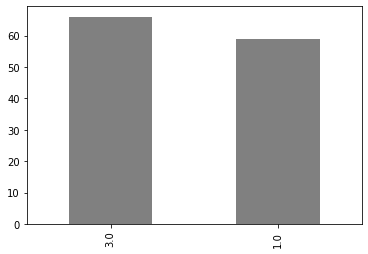

In [38]:
target_data.value_counts().plot(kind='bar',color='gray'); # 125 data